# Final Project for IBM course Statistics for Data Science with Python with Boston housing database.

Importing needed libraries.

In [2]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import scipy.stats

In [10]:
pip install -U seaborn

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 285 kB 18.8 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
Note: you may need to restart the kernel to use updated packages.


Importing Boston housing database.

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

Loading heading of dataset, for the sake of it.

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


We also may need a description.

In [21]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Visualisation part

### Quest 1, For the "Median value of owner-occupied homes" provide a boxplot.

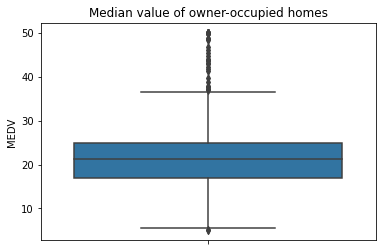

In [16]:
box = sns.boxplot(y = boston_df['MEDV']).set_title('Median value of owner-occupied homes')

<b>Conclusion:</b> Median value is 21, and there is a lot of outliers in 40-50 range, above 75% quartile. 

### Quest 2, Provide a histogram for the Charles river variable.

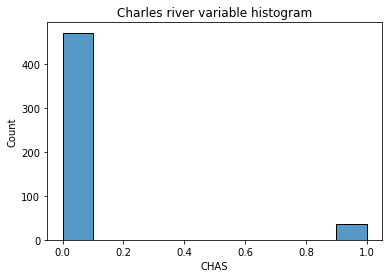

In [19]:
hist1 = sns.histplot(data=boston_df, x="CHAS").set_title('Charles river variable histogram')

<b>Conclusion:</b> Most of the houses situated far from Charles river, only about 5% are close to it.

### Quest 3, Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older).

Spliting data by age.

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'

Here come the graph.

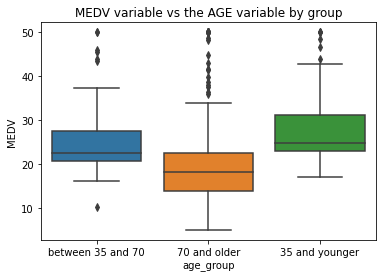

In [22]:
box2 = sns.boxplot(y = 'MEDV', x = 'age_group', data = boston_df).set_title('MEDV variable vs the AGE variable by group')

<b>Conclusion:</b> For buildings below 70 years we have roughtly the same data, with median around 25 and 25% quartile of 18. For houses with age 70+ median is much lower. All three groups has a lot of outliers above 75% quartile, but almost nonw below 25% qurtile.

### Quest 4, Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'scatterplot of relationship between NOX and INDUS')

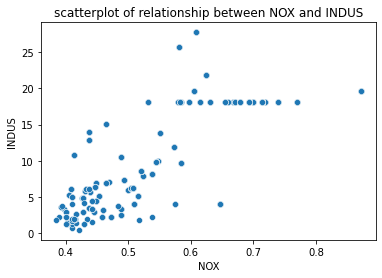

In [26]:
sns.scatterplot(data = boston_df, x = 'NOX', y = 'INDUS').set_title('scatterplot of relationship between NOX and INDUS')

<b>Conclusion:</b> Lots of dots concentarted around bissectrice of the graph. Variables seems to be lineary dependant.

### Quest 5, Create a histogram for the pupil to teacher ratio variable.

Text(0.5, 1.0, 'Pupil to teacher ratio variable')

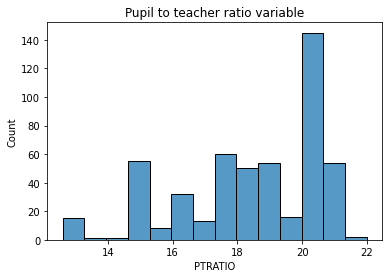

In [27]:
sns.histplot(data=boston_df, x="PTRATIO").set_title('Pupil to teacher ratio variable')

<b>Conclusion:</b> Most teachers has 21 pupil, mean seems to be around 18. From description we know it's 18.5.

# Statistics part

### Quest 6, stats 1, Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?

State the hypothesis:

<b>H0:µ1=µ2</b> ("there is no significant difference in median value of houses bounded by the Charles river and the ones not bounded by Charles river")

<b>H1:µ1≠µ2</b> ("there is a significant difference in median value of houses bounded by the Charles river and the ones not bounded by Charles river")

In [10]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

<b>Conclusion:</b> Since p < 0.05, so we can reject null hypothesis. There is differance between median value of houses bounded by the Charles river.

### Quest 7, stats 2, Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis:

<b>H0:µ1=µ2=µ3</b> (the three median values of houses means are equal)

<b>H1:</b> (at least one of means is different)

In [29]:
f_statistic, p_value = scipy.stats.f_oneway (boston_df[boston_df['age_group'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


<b>Conclusion:</b> Since p < 0.05, apparently there is a difference in Median values between choosen groups. That confirms what we've seen on boxplot in question 3.

### Quest 8, stats 3, Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

<b>H0:</b> Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town.

<b>H1:</b> Nitric oxide concentrations is correlated with proportion of non-retail business acres per town.

In [13]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

<b>Conclusion:</b> Since p < 0.05 we can reject null hypothesis safly assume the correlation between Nitric oxide concentrations and proportion of non-retail business acres per town. That was also our conclusion from the scatterplot.

### Quest 9, stats 4, What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [30]:
# DIS our input variable
X = boston_df['DIS']
# MEDV is out target
y = boston_df['MEDV']
# we need to add intercept constant
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.21e-08
Time:                        14:23:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Conclusion:</b> Since p < 0.05, we must reject the null hypothesis that there is no influenc of distance on median value. Coef 1.0916 tells us that the distance add 1.0916 to median value.